# Problema 1

En coordenadas cartesianas tenemos que $x = l\sin\theta$ e $y=h_0\cos(\omega t) + l \cos\theta$. 

Así $\dot{x} = l\dot{\theta}\cos\theta$ e $\dot{y} = -(h_0\omega\sin(\omega t) + l \dot{\theta}\sin\theta )$

La energía cinética es $K = \frac{1}{2}m(\dot{x}^2 + \dot{y}^2) = \frac{1}{2}m[l^2\dot{\theta}^2 + 2h_0l\omega\dot{\theta}\sin(\omega t)\sin(\theta) + h_0^2\omega^2\sin^2(\omega t)]$

La energía potencial es $V = mgy = mgh_0\cos(\omega t) + mgl \cos\theta$.

El lagrangiano es entonces 

$\mathcal{L} = \frac{1}{2}m[l^2\dot{\theta}^2 + 2h_0l\omega\dot{\theta}\sin(\omega t)\sin(\theta) + h_0^2\omega^2\sin^2(\omega t)] - mgh_0\cos(\omega t) - mgl \cos\theta$

Entonces $\frac{\partial\mathcal{L}}{\partial\theta} = mh_0l\omega\dot{\theta}\sin(\omega t)\cos(\theta) + mgl \sin\theta$; $\frac{\partial\mathcal{L}}{\partial\dot{\theta}} = ml^2\dot{\theta}+mh_0l\omega\sin(\omega t)\sin(\theta)$

Luego $\frac{d}{dt}(\frac{\partial\mathcal{L}}{\partial\dot{\theta}}) = ml^2\ddot{\theta}+mh_0l\omega^2\cos(\omega t)\sin(\theta) + mh_0l\omega\dot{\theta}\sin(\omega t)\cos(\theta)$

La ecuación de movimiento es entonces

$ml^2\ddot{\theta}+mh_0l\omega^2\cos(\omega t)\sin(\theta) + mh_0l\omega\dot{\theta}\sin(\omega t)\cos(\theta)-mh_0l\omega\dot{\theta}\sin(\omega t)\cos(\theta) - mgl \sin\theta = 0$

Que se reduce a la ecuación de movimiento 
$\fbox{$l\ddot{\theta}+h_0\omega^2\cos(\omega t)\sin\theta - g \sin\theta = 0$}$

Si $h_0 = 0$ obtenemos la ecuación de movimiento $l\ddot{\theta}- g \sin\theta = 0$ si $\theta$ es pequeño entonces obtenemos $l\ddot{\theta}- g \theta = 0$ que es la ecuación de un oscilador armónico simple.



# Problema 2

Del esquema de velocidad de Verlet tenemos que 

$\mathbf{r_{n+1}} = \mathbf{r_n} + \tau\mathbf{v_n} + \frac{1}{2}\tau^2\mathbf{a_n}$

Pero del método de Verlet tenemos que  
$\mathbf{v_{n}} =\frac{\mathbf{r_{n+1}}-\mathbf{r_{n-1}}}{2\tau}$

Entonces 

$\mathbf{r_{n+1}} = \mathbf{r_n} + \tau(\frac{\mathbf{r_{n+1}}-\mathbf{r_{n-1}}}{2\tau}) + \frac{1}{2}\tau^2\mathbf{a_n}$

$\mathbf{r_{n+1}} = \mathbf{r_n} + \frac{\mathbf{r_{n+1}}-\mathbf{r_{n-1}}}{2} + \frac{1}{2}\tau^2\mathbf{a_n}$

Despejando $\mathbf{r_{n+1}}$ se obtiene que


$\frac{1}{2}\mathbf{r_{n+1}} = \mathbf{r_n} -\frac{1}{2}\mathbf{r_{n-1}} + \frac{1}{2}\tau^2\mathbf{a_n}$

Multiplicando por 2 obtenemos

$\mathbf{r_{n+1}} = 2\mathbf{r_n} -\mathbf{r_{n-1}} + \tau^2\mathbf{a_n}$

Que coincide con los valores de $\mathbf{r_n}$ dados por los calculados con el método standard de Verlet

# Problema 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = 10.
l = 10.
omega = 1.
t = 0.
h0 = 0.

In [3]:
def Accel(theta,t):
    a = g*np.sin(theta)/l - omega**2.*h0*np.sin(theta)*np.cos(omega*t)/l
    return a

def VerletVel(r0,v0,t,dt):
    r = r0 +v0*dt+0.5*Accel(r0,t)*dt**2.
    v = v0 + 0.5*(Accel(r,t+dt)+Accel(r0,t))*dt
    return r,v

def Verlet(r1,r0,v0,t,dt):
    r = 2.*r1-r0+Accel(r1,t)*dt**2.
    v = 0.5*(r-r0)/dt
    return r,v

def Euler(r0,v0,t,dt):
    v = v0 + Accel(r0,t)*dt
    r = r0 + v0 * dt
    return r,v

def EulerCromer(r0,v0,t,dt):
    v = v0 + Accel(r0,t)*dt
    r = r0 + v * dt
    return r,v

Problema 1.a.1

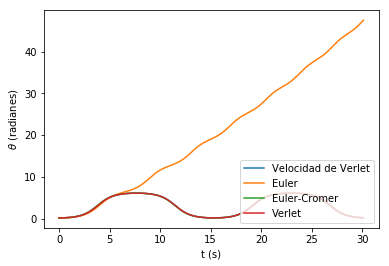

In [4]:
dt = 0.1
steps = 300
deg = 10.
omega_pen = 0.
t = 0.
theta = np.radians(deg)

omegaEU,omegaEC,omegaVer = omega_pen,omega_pen,omega_pen
thetaEU,thetaEC,thetaVer = theta,theta,theta
Thetaarr,T = [theta],[t]
ThetaEU,ThetaEC,ThetaVer=[theta],[theta],[theta]
theta_old = thetaVer-omegaVer*dt+ 0.5*Accel(thetaVer,t)*dt**2.
for i in range(steps+1):
    theta,omega_pen = VerletVel(theta,omega_pen,t,dt)
    thetaEU,omegaEU = Euler(thetaEU,omegaEU,t,dt)
    thetaEC,omegaEC = EulerCromer(thetaEC,omegaEC,t,dt)
    theta_new,omegaVer = Verlet(thetaVer,theta_old,omegaVer,t,dt)
    theta_old = thetaVer
    thetaVer = theta_new
    t+=dt
    Thetaarr.append(theta),T.append(t)
    ThetaEU.append(thetaEU),ThetaEC.append(thetaEC)
    ThetaVer.append(thetaVer)

plt.plot(T,Thetaarr,label='Velocidad de Verlet')
plt.plot(T,ThetaEU,label='Euler')
plt.plot(T,ThetaEC,label='Euler-Cromer')
plt.plot(T,ThetaVer,label='Verlet')
plt.xlabel('t (s)')
plt.ylabel(r'$\theta$ (radianes)')
plt.legend(loc=4)
plt.show()

Problema 1.a.2

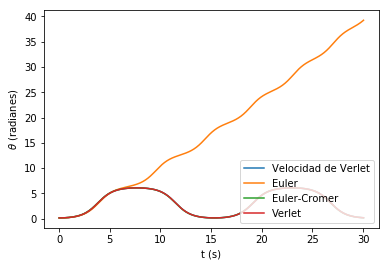

In [5]:
dt = 0.05
steps = 600
deg = 10.
omega_pen = 0.
t = 0.
theta = np.radians(deg)

omegaEU,omegaEC,omegaVer = omega_pen,omega_pen,omega_pen
thetaEU,thetaEC,thetaVer = theta,theta,theta
Thetaarr,T = [theta],[t]
ThetaEU,ThetaEC,ThetaVer=[theta],[theta],[theta]
theta_old = thetaVer-omegaVer*dt+ 0.5*Accel(thetaVer,t)*dt**2.
for i in range(steps+1):
    theta,omega_pen = VerletVel(theta,omega_pen,t,dt)
    thetaEU,omegaEU = Euler(thetaEU,omegaEU,t,dt)
    thetaEC,omegaEC = EulerCromer(thetaEC,omegaEC,t,dt)
    theta_new,omegaVer = Verlet(thetaVer,theta_old,omegaVer,t,dt)
    theta_old = thetaVer
    thetaVer = theta_new
    t+=dt
    Thetaarr.append(theta),T.append(t)
    ThetaEU.append(thetaEU),ThetaEC.append(thetaEC)
    ThetaVer.append(thetaVer)

plt.plot(T,Thetaarr,label='Velocidad de Verlet')
plt.plot(T,ThetaEU,label='Euler')
plt.plot(T,ThetaEC,label='Euler-Cromer')
plt.plot(T,ThetaVer,label='Verlet')
plt.xlabel('t (s)')
plt.ylabel(r'$\theta$ (radianes)')
plt.legend(loc=4)
plt.show()

Problema 1.a.3

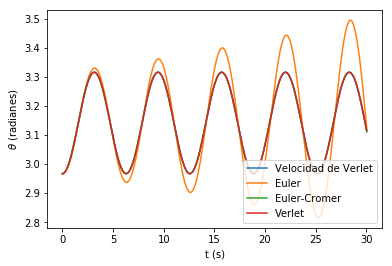

In [6]:
dt = 0.05
steps = 600
deg = 170.
omega_pen = 0.
t = 0.
theta = np.radians(deg)

omegaEU,omegaEC,omegaVer = omega_pen,omega_pen,omega_pen
thetaEU,thetaEC,thetaVer = theta,theta,theta
Thetaarr,T = [theta],[t]
ThetaEU,ThetaEC,ThetaVer=[theta],[theta],[theta]
theta_old = thetaVer-omegaVer*dt+ 0.5*Accel(thetaVer,t)*dt**2.
for i in range(steps+1):
    theta,omega_pen = VerletVel(theta,omega_pen,t,dt)
    thetaEU,omegaEU = Euler(thetaEU,omegaEU,t,dt)
    thetaEC,omegaEC = EulerCromer(thetaEC,omegaEC,t,dt)
    theta_new,omegaVer = Verlet(thetaVer,theta_old,omegaVer,t,dt)
    theta_old = thetaVer
    thetaVer = theta_new
    t+=dt
    Thetaarr.append(theta),T.append(t)
    ThetaEU.append(thetaEU),ThetaEC.append(thetaEC)
    ThetaVer.append(thetaVer)

plt.plot(T,Thetaarr,label='Velocidad de Verlet')
plt.plot(T,ThetaEU,label='Euler')
plt.plot(T,ThetaEC,label='Euler-Cromer')
plt.plot(T,ThetaVer,label='Verlet')
plt.xlabel('t (s)')
plt.ylabel(r'$\theta$ (radianes)')
plt.legend(loc=4)
plt.show()

En los resultados para el esquema de velocidad de Verlet, Euler-Cromer y el método de Verlet no tenemos gran diferencia, mientras que para el método de Euler tenemos perdida energética.

Problema 1.a.1,a'

$\omega \ll \sqrt{\frac{g}{l}}$

In [7]:
h0 = 0.12*l

In [8]:
omega = 0.05*np.sqrt(g/l)

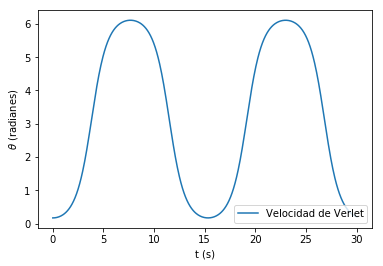

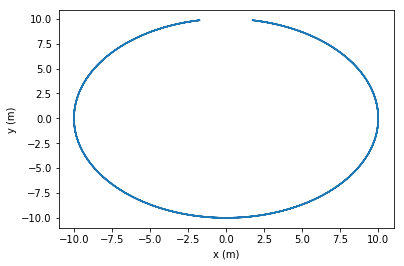

In [9]:
dt = 0.05
steps = 600
deg = 10.
omega_pen = 0.
t = 0.
theta = np.radians(deg)

Thetaarr,T = [theta],[t]
for i in range(steps+1):
    theta,omega_pen = VerletVel(theta,omega_pen,t,dt)
    t+=dt
    Thetaarr.append(theta),T.append(t)

plt.plot(T,Thetaarr,label='Velocidad de Verlet')
plt.xlabel('t (s)')
plt.ylabel(r'$\theta$ (radianes)')
plt.legend(loc=4)
plt.show()


plt.plot(l*np.sin(Thetaarr),l*np.cos(Thetaarr))
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

Problema 1.a.1,b'

$\omega \approx \sqrt{\frac{g}{l}}$

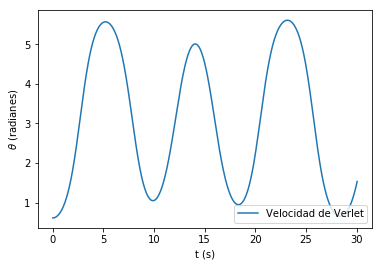

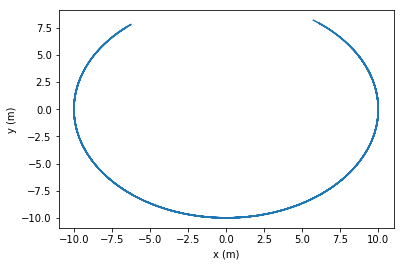

In [10]:
omega = 1.1*np.sqrt(g/l)
dt = 0.05
steps = 600
deg = 35.
omega_pen = 0.
t = 0.
theta = np.radians(deg)

Thetaarr,T = [theta],[t]
for i in range(steps+1):
    theta,omega_pen = VerletVel(theta,omega_pen,t,dt)
    t+=dt
    Thetaarr.append(theta),T.append(t)

plt.plot(T,Thetaarr,label='Velocidad de Verlet')
plt.xlabel('t (s)')
plt.ylabel(r'$\theta$ (radianes)')
plt.legend(loc=4)
plt.show()


plt.plot(l*np.sin(Thetaarr),l*np.cos(Thetaarr))
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

Problema 1.a.1,c'

$\omega \gg \sqrt{\frac{g}{l}}$

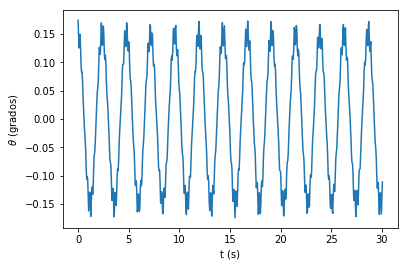

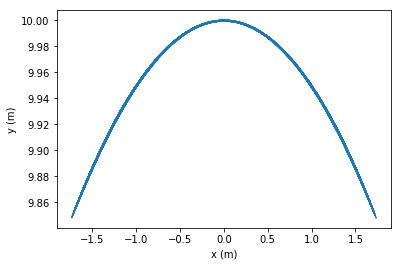

In [11]:
omega = 30.*np.sqrt(g/l)
dt = 0.05
steps = 600
deg = 10.
omega_pen = 0.
t = 0.
theta = np.radians(deg)

Thetaarr,T = [theta],[t]
for i in range(steps+1):
    theta,omega_pen = VerletVel(theta,omega_pen,t,dt)
    t+=dt
    Thetaarr.append(theta),T.append(t)

plt.plot(T,Thetaarr,label='Velocidad de Verlet')
plt.xlabel('t (s)')
plt.ylabel(r'$\theta$ (grados)')
plt.show()


plt.plot(l*np.sin(Thetaarr),l*np.cos(Thetaarr))
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

Problema 1.c)

Espacio Fase

$\omega \ll \sqrt{\frac{g}{l}}$

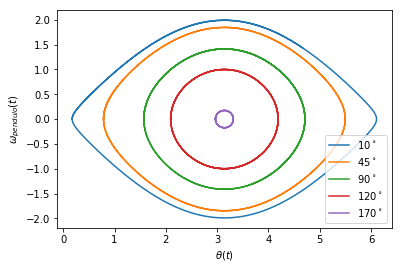

In [12]:
dt = 0.01
steps = 2000
omega = 0.05*np.sqrt(g/l)
deg = [10,45,90,120,170]
for i in deg:
    omega_pen = 0.
    t = 0.
    theta = np.radians(i)
    ThetaArr,OmegaPenArr = [theta],[omega_pen]
    for j in range(steps+1):
        theta,omega_pen = VerletVel(theta,omega_pen,t,dt)
        t+=dt
        ThetaArr.append(theta),OmegaPenArr.append(omega_pen)
    plt.plot(ThetaArr,OmegaPenArr,'',label = r'%d$^\circ$'%(i))

plt.xlabel(r'$\theta(t)$')
plt.ylabel(r'$\omega_{pendulo}(t)$')
plt.legend(loc=4)
plt.show()

$\omega \approx \sqrt{\frac{g}{l}}$

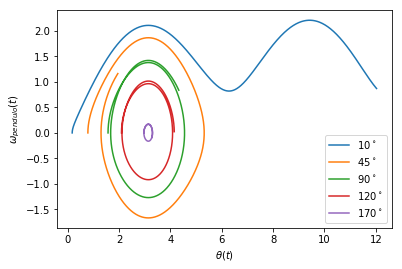

In [13]:
dt = 0.01
steps = 1000
omega = 1.1*np.sqrt(g/l)
deg = [10,45,90,120,170]
for i in deg:
    omega_pen = 0.
    t = 0.
    theta = np.radians(i)
    ThetaArr,OmegaPenArr = [theta],[omega_pen]
    for j in range(steps+1):
        theta,omega_pen = VerletVel(theta,omega_pen,t,dt)
        t+=dt
        ThetaArr.append(theta),OmegaPenArr.append(omega_pen)
    plt.plot(ThetaArr,OmegaPenArr,'',label = r'%d$^\circ$'%(i))

plt.xlabel(r'$\theta(t)$')
plt.ylabel(r'$\omega_{pendulo}(t)$')
plt.legend(loc=4)
plt.show()

$\omega \gg \sqrt{\frac{g}{l}}$

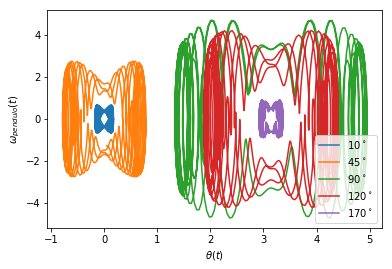

In [14]:
dt = 0.01
steps = 1000
omega = 30.*np.sqrt(g/l)
deg = [10,45,90,120,170]
for i in deg:
    omega_pen = 0.
    t = 0.
    theta = np.radians(i)
    ThetaArr,OmegaPenArr = [theta],[omega_pen]
    for j in range(steps+1):
        theta,omega_pen = VerletVel(theta,omega_pen,t,dt)
        t+=dt
        ThetaArr.append(theta),OmegaPenArr.append(omega_pen)
    plt.plot(ThetaArr,OmegaPenArr,'',label = r'%d$^\circ$'%(i))

plt.xlabel(r'$\theta(t)$')
plt.ylabel(r'$\omega_{pendulo}(t)$')
plt.legend(loc=4)
plt.show()

Problema 1.d)

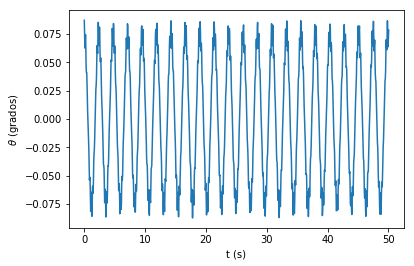

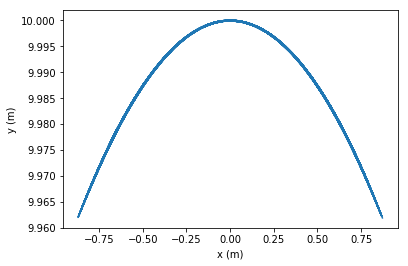

In [15]:
omega = 30.*np.sqrt(g/l)
dt = 0.05
steps = 1000
deg = 5.
omega_pen = 0.
t = 0.
theta = np.radians(deg)

Thetaarr,T = [theta],[t]
for i in range(steps+1):
    theta,omega_pen = VerletVel(theta,omega_pen,t,dt)
    t+=dt
    Thetaarr.append(theta),T.append(t)

plt.plot(T,Thetaarr,label='Velocidad de Verlet')
plt.xlabel('t (s)')
plt.ylabel(r'$\theta$ (grados)')
plt.show()


plt.plot(l*np.sin(Thetaarr),l*np.cos(Thetaarr))
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

El péndulo oscila cerca de $\theta \approx 0$